Questo codice esegue l'analisi dell'importanza delle caratteristiche (feature importance) utilizzando un modello di classificazione RandomForest.

L'output del codice sarà una lista delle feature selezionate con i relativi valori di importanza. Questo può essere utile per comprendere quali variabili hanno maggiore impatto nella previsione delle anomalie.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

data = pd.read_csv('LOF_scores.csv')

#Trasforma feature non numeriche in numeriche con LabelEncoder
encoder = LabelEncoder()
data['country_encoded'] = encoder.fit_transform(data['country'])
data['iban_encoded'] = encoder.fit_transform(data['IBAN_bankCode'])
data['businessName_encoded'] = encoder.fit_transform(data['businessName'])
data['userAgent_browserFamily_encoded'] = encoder.fit_transform(data['userAgent_browserFamily'])
data['userAgent_osFamily_encoded'] = encoder.fit_transform(data['userAgent_osFamily'])
data['SIA_encoded'] = encoder.fit_transform(data['SIA'])
data['companyType_encoded'] = encoder.fit_transform(data['companyType'])

#Converte la colonna 'timestamp' in tipo datetime
data['timestamp'] = pd.to_datetime(data['timestamp'])

#Converte la colonna "timestamp" da un formato di data e ora a un timestamp Unix espresso in millisecondi
data['timestamp'] = data['timestamp'].astype(int) // 10**9

features = ['customerId', 'timestamp', 'amount', 'userAgent_isPc', 'CAP', 'SAE', 'RAE', 'country_encoded', 'iban_encoded', 'businessName_encoded', 'userAgent_browserFamily_encoded', 'userAgent_osFamily_encoded', 'SIA_encoded', 'companyType_encoded']


#Addestramento modello RandomForest
X = data[features]
y = data['label']
rf = RandomForestClassifier()
rf.fit(X, y)

feature_importances = rf.feature_importances_

print("Feature Importances:")
for feature, importance in zip(features, feature_importances):
    print(f"{feature}: {importance:.2f}")


Feature Importances:
customerId: 0.06
timestamp: 0.14
amount: 0.27
userAgent_isPc: 0.00
CAP: 0.05
SAE: 0.01
RAE: 0.04
country_encoded: 0.00
iban_encoded: 0.16
businessName_encoded: 0.16
userAgent_browserFamily_encoded: 0.02
userAgent_osFamily_encoded: 0.01
SIA_encoded: 0.07
companyType_encoded: 0.01


Questo codice identifica le anomalie nei dati basandosi sullo z-score della colonna "amount" e salva queste anomalie in un file Excel.
Viene calcolato lo z-score per ogni valore nella colonna "amount". Lo z-score è una misura statistica che indica quanto un dato valore si discosta dalla media in termini di deviazioni standard. È utilizzato per valutare quanto un dato valore sia atipico o fuori dalla norma all'interno di un insieme di dati.
Viene impostata una soglia per identificare le anomalie. Le righe con uno z-score che supera questa soglia verranno considerate probabili anomalie.
Viene stampato lo z-score con la rispettiva colonna label per verificare quante anomalie corrispondono effettivamente ad uno z-score al di sopra della soglia.

In [ ]:
import pandas as pd

# Montaggio Google Drive
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('LOF_scores.csv')

media_importo = df['amount'].mean()
varianza_importo = df['amount'].var()
deviazione_standard_importo = df['amount'].std()

media_importo = round(media_importo, 2)
varianza_importo = round(varianza_importo, 2)

print(f"Media dell'importo: {media_importo}")
print(f"Varianza dell'importo: {varianza_importo}")

# Calcola lo z-score per ogni valore di "amount"
df['z_score'] = (df['amount'] - media_importo) / deviazione_standard_importo

# Soglia al di sopra della quale viene stampato lo z-score
soglia = 5

#Righe con uno z-score maggiore della soglia
anomalie = df[df['z_score'].abs() > soglia]

print(anomalie[['z_score', 'label']])

anomalie_selezionate = anomalie[['z_score', 'label']]

# Salva le colonne selezionate su Google Drive in un file Excel
anomalie_selezionate.to_excel('/content/drive/MyDrive/anomalie_LOF.xlsx', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Media dell'importo: 4094.35
Varianza dell'importo: 495432714.87
         z_score  label
761    22.279565      1
808    15.050501      1
966     6.344879     -1
968    20.033214      1
1029   17.786863      1
...          ...    ...
87133   6.567590      1
87155   8.801458      1
87827  23.582449      1
88464  23.582449      1
90905  11.946350      1

[328 rows x 2 columns]


Questo codice crea due istogrammi per visualizzare la distribuzione dei valori nella colonna "amount":


1.   Il primo istogramma fornisce una rappresentazione visuale della distribuzione dei dati relativi all'importo delle transazioni.
2.   Il secondo istogramma aiuta a visualizzare come sono distribuiti gli importi delle transazioni identificate come anomalie.

Visualizzare entrambi gli istogrammi può servire a confrontare la distribuzione degli importi delle transazioni normali con quella delle transazioni anomale

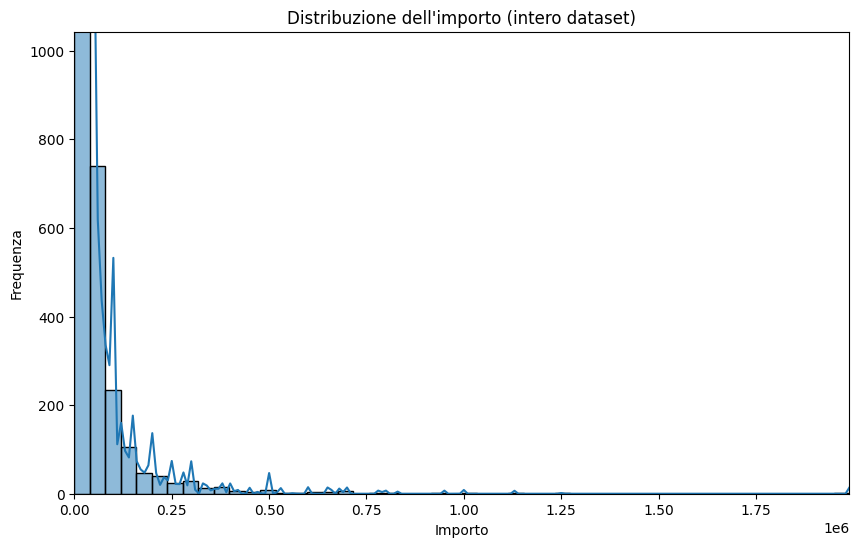

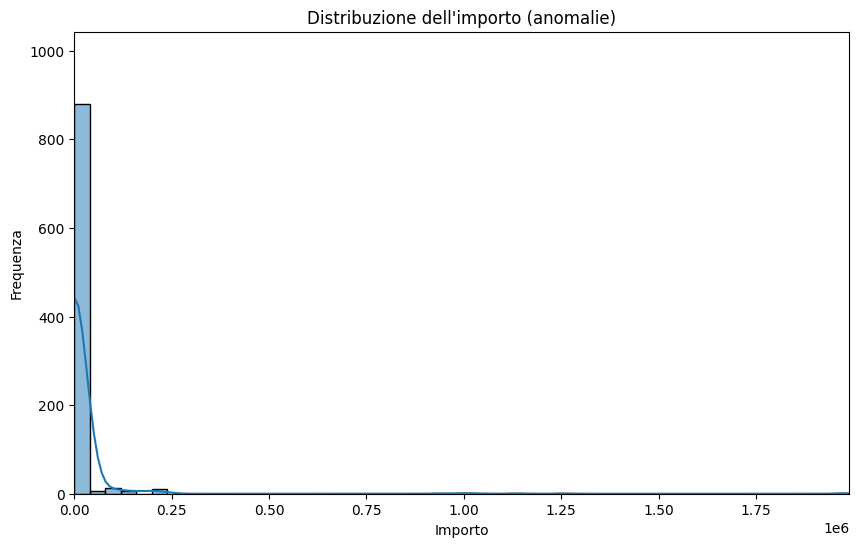

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.read_csv('LOF_scores.csv')

anomalie = df[df['label'] == -1]

#Istogramma per l'intero dataset
plt.figure(figsize=(10, 6))
sns.histplot(df['amount'], bins=50, kde=True)

# Imposta l'intervallo dell'asse X in base ai dati reali
plt.xlim(0, df['amount'].max())

# Imposta l'intervallo dell'asse Y in base ai dati reali
plt.ylim(0, df['amount'].value_counts().max())

plt.title('Distribuzione dell\'importo (intero dataset)')
plt.xlabel('Importo')
plt.ylabel('Frequenza')
plt.show()

#Istogramma per le anomalie
plt.figure(figsize=(10, 6))
sns.histplot(anomalie['amount'], bins=50, kde=True)

# Imposta l'intervallo dell'asse X in base ai dati reali
plt.xlim(0, df['amount'].max())

# Imposta l'intervallo dell'asse Y in base ai dati reali
plt.ylim(0, df['amount'].value_counts().max())


plt.title('Distribuzione dell\'importo (anomalie)')
plt.xlabel('Importo')
plt.ylabel('Frequenza')
plt.show()


Questo codice esegue un'analisi delle correlazioni tra le variabili presenti nel dataset e la colonna "label".  Queste correlazioni possono fornire informazioni su quanto una variabile è correlata alla presenza di anomalie nei dati. Le correlazioni variano da -1 a 1, dove -1 indica una forte correlazione negativa, 1 indica una forte correlazione positiva e 0 indica assenza di correlazione.

In [ ]:
import pandas as pd

data = pd.read_csv('LOF_scores.csv')

#Calcola la correlazione tra tutte le variabili e "label"
correlations = data.corrwith(data['label'])

correlations = correlations.drop(['label'])

correlations = correlations.drop(['Unnamed: 0'])

correlations = correlations.drop(['scores'])

print("Correlazioni con 'is_anomaly' (esclusa 'label' vs. 'label' e 'Unnamed: 0' vs. 'label'):")
print(correlations)


Correlazioni con 'is_anomaly' (esclusa 'label' vs. 'label' e 'Unnamed: 0' vs. 'label'):
customerId       -0.002929
amount           -0.054714
userAgent_isPc    0.002669
CAP              -0.035348
SAE              -0.012265
RAE              -0.004328
dtype: float64


<ipython-input-7-106b4615d542>:6: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corrwith(data['label'])


Rappresentazione in un grafico a barre orizzontali delle correlazioni precedentemente trovate.

<ipython-input-8-e3c1d1b80cac>:8: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = data.corrwith(data['label'])


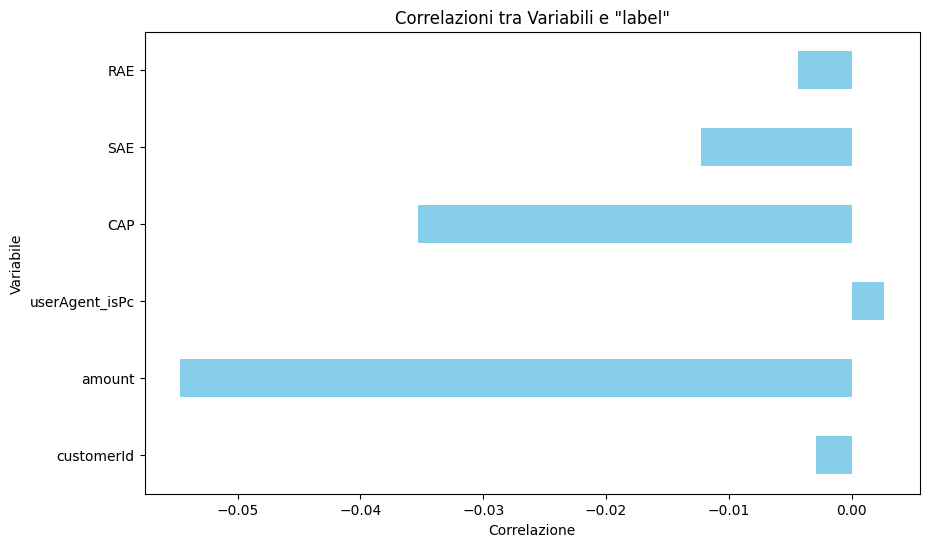

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('LOF_scores.csv')

#Crea un grafico a barre orizzontali per le correlazioni

correlations = data.corrwith(data['label'])

correlations = correlations.drop(['label'])

correlations = correlations.drop(['Unnamed: 0'])

correlations = correlations.drop(['scores'])

plt.figure(figsize=(10, 6))
correlations.plot(kind='barh', color='skyblue')
plt.xlabel('Correlazione')
plt.ylabel('Variabile')
plt.title('Correlazioni tra Variabili e "label"')
plt.show()


Questo codice consente di visualizzare come le anomalie si distribuiscono nel tempo, consentendo di individuare eventuali tendenze o picchi di anomalie in base alle date.

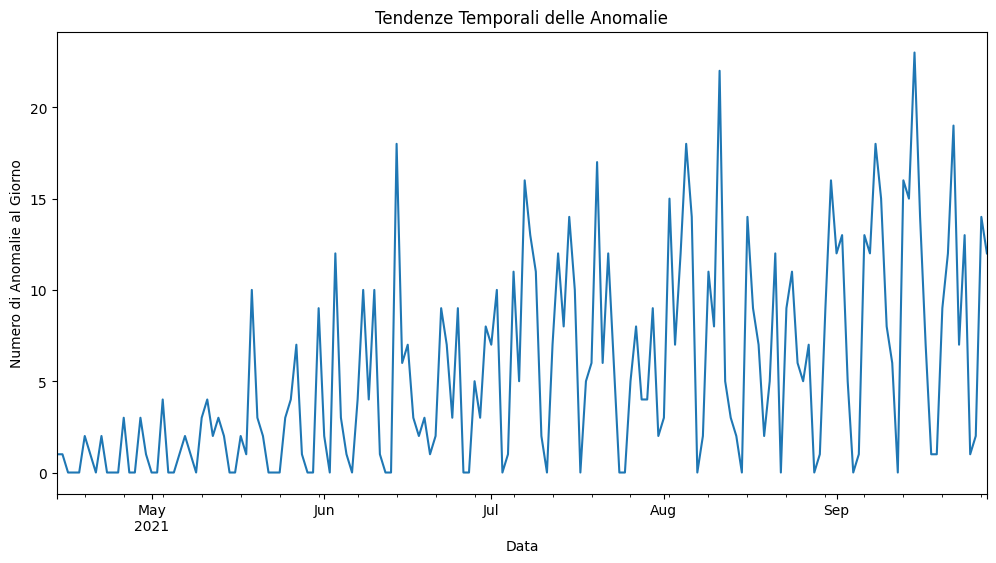

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('LOF_scores.csv')


#Analisi delle tendenze temporali delle anomalie
data['timestamp'] = pd.to_datetime(data['timestamp'])
data.set_index('timestamp', inplace=True)
anomalies_over_time = data[data['label'] == -1].resample('D').size()

#Visualizzazione delle tendenze temporali delle anomalie
plt.figure(figsize=(12, 6))
anomalies_over_time.plot()
plt.title('Tendenze Temporali delle Anomalie')
plt.xlabel('Data')
plt.ylabel('Numero di Anomalie al Giorno')
plt.show()
